<a href="https://colab.research.google.com/github/HofstraDoboli/TextMining_F22/blob/main/movie_clustering_agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import os
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/TextMining_F22
%ls *.csv

/content/drive/MyDrive/TextMining_F22
wiki_movie_plots_deduped.csv


In [5]:
dir_file = os.getcwd() # returns path to current directory
files_dir = os.listdir(dir_file)  # list of files in current directory

csv_files = [f for f in files_dir if f.endswith('csv')]
print(csv_files)
movie_file = csv_files[0]

movie_df = pd.read_csv(movie_file)
print(movie_df.columns)  # the columns
print(movie_df.shape)

['wiki_movie_plots_deduped.csv']
Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')
(34886, 8)


In [6]:
# genres
movie_df.Genre[movie_df.Genre == 'sci-fi'].value_counts()

sci-fi    221
Name: Genre, dtype: int64

In [7]:
choose_genres = ['western', 'thriller', 'sci-fi']
select_movies = movie_df[['Plot', 'Genre']][movie_df['Genre'].isin(choose_genres)]
select_movies.head()

,Plot,Genre
6,The film opens with two bandits breaking into ...,western
21,The film opens in a town on the Mexican border...,western
97,Esra Kincaid (La Reno) takes land by force and...,western
99,Rough-and-tumble Gold Rush-era California: a w...,western
101,James Wynnegate (Dustin Farnum) and his cousin...,western


In [8]:
import numpy as np
import spacy   # another tokenizer, lemmatizer (has --> be)
nlp = spacy.load('en_core_web_sm')
nlp.disable_pipes('parser', 'ner') 

['parser', 'ner']

In [9]:
def nlp_processing(doc): # from indexing.ipyns
    tokens = nlp(doc)
    
    #print(type(tokens))
    # eliminates stop words  and non alpha num and converts all to lower case
    terms = [token.lemma_.lower() for token in tokens if not token.is_stop and token.is_alpha] 
  
    return terms

vect = CountVectorizer(tokenizer = nlp_processing, min_df = 10) # ? why 50 

counter = vect.fit_transform(select_movies['Plot'])
 # matrix representation of each movie as a tf-idf vector
print(len(vect.get_feature_names_out()))

print(vect.get_feature_names_out()[:100])
print(vect.get_feature_names_out()[-20:])

print(counter.shape)
tf_all = counter.sum(axis = 0)
print(tf_all.shape)
ind_terms_sorted = tf_all.argsort()
print(ind_terms_sorted.shape)
print(tf_all[0,ind_terms_sorted[0,0:20]])
print(tf_all[0,ind_terms_sorted[0,-20:]])
print('rarest', vect.get_feature_names_out()[ind_terms_sorted[0,:20]])
print('most common', vect.get_feature_names_out()[ind_terms_sorted[0,-20:]])

3921
['abandon' 'abduct' 'abduction' 'abductor' 'ability' 'able' 'aboard'
 'abort' 'abraham' 'abruptly' 'absence' 'absorb' 'abuse' 'abusive'
 'accept' 'access' 'accident' 'accidental' 'accidentally' 'accompany'
 'accomplice' 'accomplish' 'accord' 'accost' 'account' 'accusation'
 'accuse' 'ace' 'achieve' 'acid' 'acknowledge' 'acquaint' 'acquaintance'
 'acquire' 'acquit' 'act' 'action' 'activate' 'active' 'activity' 'actor'
 'actress' 'actual' 'actually' 'adam' 'adams' 'add' 'addict' 'addition'
 'additional' 'address' 'adjacent' 'administer' 'admire' 'admit' 'adopt'
 'adoptive' 'adult' 'advance' 'advanced' 'advantage' 'adventure' 'advice'
 'advise' 'aerial' 'affair' 'affect' 'affection' 'afford' 'afraid'
 'africa' 'african' 'aftermath' 'afternoon' 'afterward' 'age' 'aged'
 'agency' 'agent' 'aggressive' 'ago' 'agree' 'agreement' 'ahead' 'aid'
 'aide' 'aim' 'air' 'aircraft' 'airline' 'airport' 'ajay' 'aka' 'al'
 'alan' 'alarm' 'albert' 'alcohol' 'alcoholic' 'alert']
['write' 'writer' 'wron

In [ ]:
# Don't use using default text processing in CountVectorizer
vect1 = CountVectorizer(stop_words = "english", lowercase = True, min_df = 100) 
counter1 = vect1.fit_transform(select_movies['Plot'])
print(len(vect1.get_feature_names_out()))

print(vect1.get_feature_names_out()[:100])
print(vect1.get_feature_names_out()[-20:])

402
['000' 'able' 'accident' 'accidentally' 'actually' 'affair' 'agent'
 'agrees' 'alive' 'american' 'apartment' 'appears' 'army' 'arrest'
 'arrested' 'arrive' 'arrives' 'asks' 'attack' 'attacked' 'attacks'
 'attempt' 'attempts' 'away' 'bank' 'battle' 'begin' 'begins' 'believe'
 'believes' 'best' 'blood' 'body' 'boss' 'boy' 'break' 'breaks' 'bring'
 'brings' 'brother' 'building' 'business' 'called' 'calls' 'captain'
 'captured' 'car' 'case' 'cattle' 'caught' 'causing' 'chief' 'child'
 'children' 'city' 'claims' 'clear' 'come' 'comes' 'coming' 'company'
 'confronts' 'continue' 'continues' 'control' 'convinces' 'couple' 'crime'
 'daughter' 'day' 'days' 'dead' 'death' 'decide' 'decides' 'demands'
 'despite' 'detective' 'did' 'die' 'died' 'dies' 'discover' 'discovered'
 'discovers' 'doctor' 'does' 'doesn' 'door' 'dr' 'drive' 'earlier' 'end'
 'ends' 'enters' 'escape' 'escapes' 'eventually' 'evidence' 'ex']
['warns' 'watch' 'water' 'way' 'wealthy' 'west' 'white' 'wife' 'window'
 'woman' 'wom

In [10]:
transf  = TfidfTransformer(norm = 'l2', sublinear_tf = True) 
# TfidfTransformer takes the CountVectorizer output and computes the tf-idf
tf_idf = transf.fit_transform(counter) 

In [ ]:
from sklearn.metrics import pairwise_distances
print(np.mean(pairwise_distances(tf_idf, metric = 'l2')))
print(np.max(pairwise_distances(tf_idf)))
print(np.min(pairwise_distances(tf_idf)))


1.3795946772743812
1.4142135623730958
0.0


## Agglomerative clustering

### TF-IDF space over 3k dimensions

complete linkage
* Eulidean 
* Cosine
average linkage
* Eulidean 
* Cosine
ward linkage 
* Eulidean 
* Cosine



In [66]:
k_clusters = 3
from matplotlib import pyplot as plt
# “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, 
# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
# 'ward' works only with 'euclidean'
# distance_threshold = 0 computes the full tree
agglom = AgglomerativeClustering(n_clusters = k_clusters, affinity='cosine', linkage = 'average', 
                                distance_threshold = None)
agglom_model = agglom.fit(tf_idf.toarray())
print(agglom_model.n_clusters_)
print("\nSilhouette Coefficient: %0.3f" %metrics.silhouette_score(tf_idf, agglom_model.labels_, metric = "cosine"))

3

Silhouette Coefficient: 0.024


In [44]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



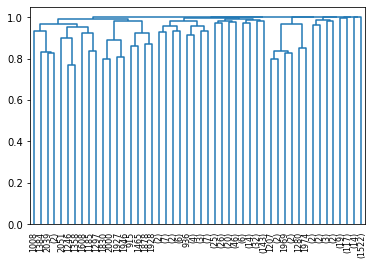

In [47]:
plot_dendrogram(agglom_model, truncate_mode="level", p=5)

In [67]:
from collections import Counter 
# compute purity 
# in each cluster - find # of dramas/ # commedies 
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np
genre = pd.Categorical(select_movies.Genre)
#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
k_clusters = agglom_model.n_clusters_
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = agglom_model.labels_ == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'thriller': 963, 'western': 863, 'sci-fi': 221})
1 Counter({'thriller': 3})
2 Counter({'western': 2})
0.47173489278752434


In [ ]:
# not working with agglomerative
print("Top terms per cluster:")
print(agglom_model.cluster_centers_.shape)
order_centroids = agglom_model.cluster_centers_.argsort()[:, ::-1]  # sort and reverse the weights for each term
terms = vect.get_feature_names_out()

for i in range(k_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:  # print first ten terms from the cluster
        print(' %s' % terms[ind]),
    print

In [ ]:
k_clusters = 3
model = KMeans(n_clusters = k_clusters,n_init = 10, verbose = False) # repeats the algorithm for 10 initializations
# returns the best model 
# model = MiniBatchKMeans(n_clusters=k_clusters, init='k-means++', max_iter=100, batch_size = 5000, 
#                        n_init = 10, verbose = 0)

model.fit(tf_idf)

print("\nSilhouette Coefficient: %0.3f" %metrics.silhouette_score(tf_idf, model.labels_, metric = "cosine"))


Silhouette Coefficient: 0.008


In [ ]:
print("Top terms per cluster:")
print(model.cluster_centers_.shape)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]  # sort and reverse the weights for each term
terms = vect.get_feature_names_out()

for i in range(k_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:  # print first ten terms from the cluster
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
(3, 3921)
Cluster 0:
 murder
 man
 find
 life
 war
 kill
 woman
 film
 lead
 family
Cluster 1:
 town
 man
 kill
 ride
 shoot
 ranch
 sheriff
 horse
 gang
 leave
Cluster 2:
 find
 police
 kill
 tell
 leave
 take
 go
 house
 reveal
 later


In [ ]:
# compute homogeneity with genre labels

# get genre for the selected movies
genre = pd.Categorical(select_movies.Genre)

print("Homogeneity: %0.3f"  % metrics.homogeneity_score(genre, model.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(genre, model.labels_))
print("V-measure: %0.3f"    % metrics.v_measure_score(genre, model.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(genre, model.labels_))

Homogeneity: 0.411
Completeness: 0.363
V-measure: 0.385
Adjusted Rand-Index: 0.330


In [ ]:
from collections import Counter 
# compute purity 
# in each cluster - find # of dramas/ # commedies 
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np

#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = model.labels_ == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'thriller': 341, 'western': 322, 'sci-fi': 71})
1 Counter({'western': 537, 'thriller': 7, 'sci-fi': 3})
2 Counter({'thriller': 618, 'sci-fi': 147, 'western': 6})
0.7290448343079922


In [ ]:
# plot clusters
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 2)
#print('explained variance')
pca.fit(tf_idf)
x2 = pca.transform(tf_idf)

In [ ]:
print(x2.shape)
# add labels
data_x2 = pd.DataFrame(x2, columns = ['x','y'])
data_x2['label'] = model.labels_
data_x2['orig_label'] = genre
data_x2.head()

(2052, 2)


,x,y,label,orig_label
0,0.194878,0.045429,1,western
1,0.229486,0.156519,1,western
2,0.109479,0.037766,0,western
3,0.075191,0.039613,0,western
4,0.222659,0.047469,1,western


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


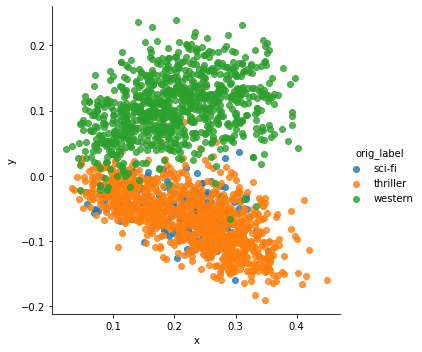

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='orig_label',fit_reg=False, legend=True, legend_out=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


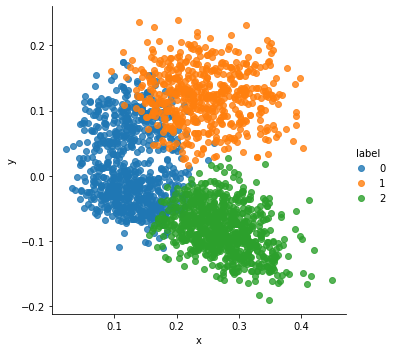

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='label',fit_reg=False, legend=True, legend_out=True) 

In [ ]:
# check some data points - ?? 

# find index for drama movies
index_drama =  select_movies['Genre'].isin(['thriller'])
index_comedy = select_movies['Genre'].isin(['western'])

print(sorted(Counter(model.labels_[index_drama]).items(),key = 
             lambda kv:(kv[1], kv[0]), reverse =True))
print(sorted(Counter(model.labels_[index_comedy]).items(),key = 
             lambda kv:(kv[1], kv[0]), reverse =True))


[(0, 861), (1, 105)]
[(1, 835), (0, 30)]


##SVD dimensionality reduction

In [ ]:
# project Tfidf model onto singular value decomposition - LSI transform and then do clustering
from sklearn.decomposition import TruncatedSVD

dim = 1000 # 1300 dimensions explain 95% variance
svd = TruncatedSVD(n_components=dim, n_iter = 10)

lsi = svd.fit_transform(tf_idf)
explained_variance = svd.explained_variance_ratio_.sum()
print("Sum of explained variance ratio: %d%%" % (int(explained_variance * 100)))

Sum of explained variance ratio: 84%


In [ ]:
# check singular values
print(svd.singular_values_[:min(dim,20)])  

Sum of explained variance ratio: 32%
[11.37668659  4.99886657  3.89349417  3.31033615  3.19558691  3.09193352
  3.00330526  2.83227131  2.81027512  2.73065076  2.70626273  2.66013061
  2.65617477  2.62511866  2.59663756  2.59053353  2.57336299  2.54722217
  2.51866679  2.49960796]


In [ ]:
k_clusters = 3
#model_lsi = MiniBatchKMeans(n_clusters=k_clusters, init='k-means++', max_iter=200, batch_size=5000, 
#                       n_init = 10)
model_lsi = KMeans(n_clusters=k_clusters, init='k-means++', max_iter=300,  
                        n_init = 10)
model_lsi.fit(lsi)
print("\nSilhouette Coefficient: %0.3f" %metrics.silhouette_score(tf_idf, model_lsi.labels_, metric = "euclidean"))


Silhouette Coefficient: 0.004


In [ ]:
from collections import Counter 
# compute purity 
# in each cluster - find # of dramas/ # commedies 
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np

#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = model_lsi.labels_ == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'thriller': 342, 'western': 325, 'sci-fi': 62})
1 Counter({'thriller': 619, 'sci-fi': 156, 'western': 5})
2 Counter({'western': 535, 'thriller': 5, 'sci-fi': 3})
0.7290448343079922


In [ ]:
# plot clusters
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 2)
#print('explained variance')
pca.fit(tf_idf)
x2 = pca.transform(tf_idf)

In [ ]:
print(x2.shape)
# add labels
data_x2 = pd.DataFrame(x2, columns = ['x','y'])
data_x2['label'] = model_lsi.labels_
data_x2['orig_label'] = genre
data_x2.head()

(1831, 2)


,x,y,label,orig_label
0,0.206739,0.044302,0,western
1,0.236199,0.138645,0,western
2,0.109489,0.045241,0,western
3,0.080366,0.037110,0,western
4,0.225288,0.040699,0,western


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


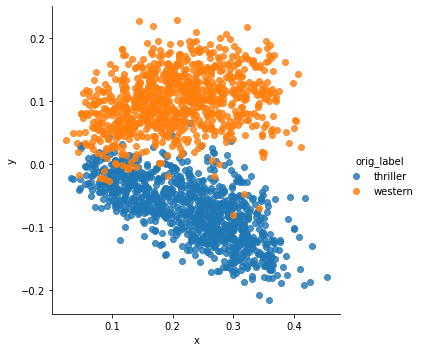

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='orig_label',fit_reg=False, legend=True, legend_out=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


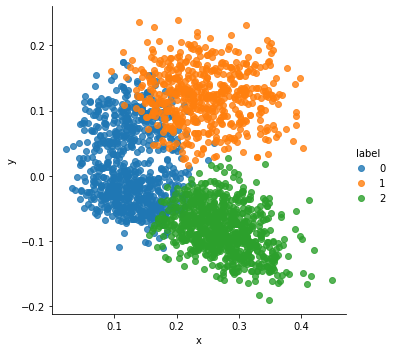

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='label',fit_reg=False, legend=True, legend_out=True) 

##Latent Dirichlet Allocation (LDA) for dimensionality reduction

In [ ]:
# LDA with sklearn
from sklearn.decomposition import LatentDirichletAllocation

num_of_topics = 20 # more topics, better to separate the clusters. 
lda_transf = LatentDirichletAllocation(
            n_components = num_of_topics, max_iter= 10, 
            learning_method = 'online', batch_size = 128)   # 'online' - faster, uses subset of data
lda = lda_transf.fit_transform(counter)
print(lda.shape)
print(lda_transf.components_.shape)

(2052, 20)
(20, 3921)


In [ ]:
# cluster based on LDA
k_clusters = 3
model_lda = KMeans(k_clusters)
#model_lda = MiniBatchKMeans(n_clusters=k_clusters, init='k-means++', max_iter=200, batch_size=1000, 
#                       n_init = 10)
model_lda.fit(lda)
print("\nSilhouette Coefficient: %0.3f" %metrics.silhouette_score(tf_idf, model_lsi.labels_, metric = "euclidean"))


Silhouette Coefficient: 0.004


In [ ]:
# compute homogeneity with genre labels

# get genre for the selected movies
genre = select_movies.Genre.copy()
genre = pd.Categorical(genre)
# labels_genre = genre.codes
# print(type(labels_genre), labels_genre.shape)

print("Homogeneity: %0.3f"  % metrics.homogeneity_score(genre, model_lda.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(genre, model_lda.labels_))
print("V-measure: %0.3f"    % metrics.v_measure_score(genre, model_lda.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(genre, model_lda.labels_))

Homogeneity: 0.218
Completeness: 0.205
V-measure: 0.211
Adjusted Rand-Index: 0.163


In [ ]:
# print top topic indices per cluster
print("Top top words per cluster:")
terms = vect.get_feature_names_out()

# TO DO: order terms in a cluster by tf-idf not just tf
# find movies in each cluster, sum up their counts and print the top words
for k in range(k_clusters):
    index_movies_k = model_lda.labels_ == k
    count_terms_k = sum(counter[index_movies_k,:])   # sum per columns (overall frequency)
    order_terms = count_terms_k.toarray().argsort()[:,::-1].ravel()  # convert to a 1D array
    print('Cluster', k)
    
    for t in order_terms[:10]:
        print('\t', terms[t], count_terms_k[0,t])

#order_centroids = model_lda.cluster_centers_.argsort()[:, ::-1]  # sort and reverse
#for i in range(k_clusters):
#print("Cluster %d:" % i),
#    for ind in order_centroids[i, :5]:  # print first ten terms from the cluster
#.   print(ind, model_lda.cluster_centers_[i,ind])

Top top words per cluster:
Cluster 0
	 kill 524
	 find 443
	 man 295
	 leave 284
	 escape 251
	 dr 250
	 take 242
	 alien 224
	 discover 221
	 ship 213
Cluster 1
	 kill 1014
	 find 892
	 tell 875
	 man 780
	 leave 715
	 go 635
	 take 607
	 try 556
	 murder 536
	 police 521
Cluster 2
	 kill 1623
	 man 1605
	 find 1107
	 leave 949
	 shoot 804
	 town 782
	 tell 734
	 take 704
	 try 641
	 woman 593


In [ ]:
from collections import Counter 
# compute purity 
# in each cluster - find # of dramas/ # commedies 
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np

#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = model_lda.labels_ == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'western': 504, 'thriller': 101, 'sci-fi': 11})
1 Counter({'thriller': 660, 'sci-fi': 68, 'western': 40})
2 Counter({'western': 321, 'thriller': 205, 'sci-fi': 142})
0.7236842105263158


In [ ]:
# plot clusters
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 2)
#print('explained variance')
pca.fit(tf_idf)
x2 = pca.transform(tf_idf)

In [ ]:
print(x2.shape)
# add labels
data_x2 = pd.DataFrame(x2, columns = ['x','y'])
data_x2['label'] = model_lda.labels_
data_x2['orig_label'] = genre
data_x2.head()

(2052, 2)


,x,y,label,orig_label
0,0.194878,0.045488,2,western
1,0.229486,0.156505,2,western
2,0.109479,0.037860,1,western
3,0.075191,0.039733,2,western
4,0.222659,0.047472,2,western


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


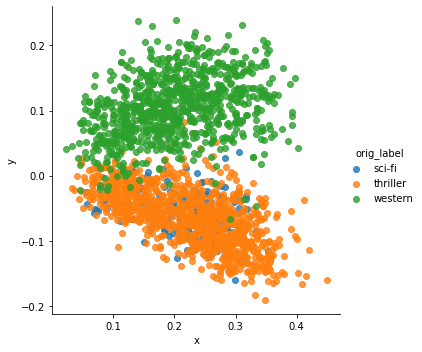

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='orig_label',fit_reg=False, legend=True, legend_out=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


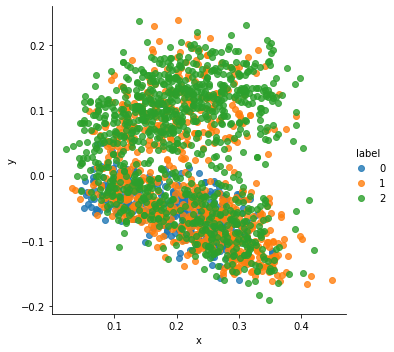

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='label',fit_reg=False, legend=True, legend_out=True) 

In [ ]:
# get largest distribution of words over topics
feature_names = vect.get_feature_names()  # feature_names - array of 8955 components
for topic_idx, topic in enumerate(lda_transf.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-11:-1]:
            words.append(feature_names[i])
        print(words)

Topic 0:
['vijay', 'chester', 'crawford', 'khan', 'singh', 'kumar', 'morris', 'lease', 'attic', 'betty']
Topic 1:
['ruth', 'patrick', 'terry', 'el', 'corey', 'donald', 'british', 'insane', 'spend', 'edgar']
Topic 2:
['david', 'rachel', 'mrs', 'laura', 'steven', 'jessie', 'ross', 'dr', 'bobby', 'sharon']
Topic 3:
['find', 'peter', 'attack', 'power', 'team', 'world', 'escape', 'destroy', 'scientist', 'use']
Topic 4:
['priya', 'ravi', 'margaret', 'ajay', 'cocaine', 'kumar', 'chennai', 'menon', 'derek', 'sunil']
Topic 5:
['sam', 'matt', 'jane', 'steve', 'adam', 'molly', 'richard', 'angela', 'cheyenne', 'jr']
Topic 6:
['gene', 'frog', 'autry', 'smiley', 'dam', 'conway', 'burnette', 'millhouse', 'baxter', 'mary']
Topic 7:
['martin', 'george', 'susan', 'mike', 'town', 'amanda', 'harris', 'lucy', 'stan', 'preacher']
Topic 8:
['find', 'tell', 'kill', 'house', 'wife', 'leave', 'take', 'go', 'life', 'woman']
Topic 9:
['arjun', 'murphy', 'mumbai', 'audie', 'harry', 'woman', 'father', 'go', 'superi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# get distribution of each document over the 10 topics
print(lda[100,:])
print(select_movies.iloc[100].Plot)
print(model_lda.labels_[100])

[3.96825397e-04 3.96825397e-04 3.96825400e-04 3.96825407e-04
 3.96825397e-04 1.82212823e-02 5.60165542e-01 3.96825403e-04
 3.96825402e-04 3.96825397e-04 3.96825403e-04 3.96825399e-04
 3.96825405e-04 3.96825408e-04 1.10543913e-01 3.96825406e-04
 3.96825406e-04 3.96825397e-04 3.96825398e-04 3.04720057e-01]
In Red River Valley, Banker Hartley Moore (Frank LaRue) schemes to sabotage the efforts of citizens to secure water rights in order to win water profits for himself. Following the murder of five men who were overseeing the completion of an irrigation system, Gene Autry (Gene Autry) is hired for the dangerous job of "ditch rider", in charge of patrolling the ditches to prevent malfunction or sabotage.
At the Red River Land and Irrigation Company, Steve Conway (Boothe Howard) works for Mary Baxter (Frances Grant) and her father, George Baxter (Sam Flint). Jealous of Mary's attention towards Gene, Conway joins Moore in his scheming actions and hires Bull Dural and his gang to dynamite the

In [ ]:
# get distribution of drama and comedy films over topics
import numpy as np

index_western =  select_movies['Genre'].isin(['western'])
index_thriller  = select_movies['Genre'].isin(['thriller'])
index_sci_fi  = select_movies['Genre'].isin(['sci-fi'])

print(lda[index_western].mean(axis = 0))
print(lda[index_thriller].mean(axis = 0))
print(lda[index_sci_fi].mean(axis = 0))

[0.00507928 0.27857604 0.00763062 0.12786623 0.00762866 0.01803683
 0.02688263 0.0334441  0.24527927 0.24957636]
[0.00620445 0.03241247 0.00858699 0.01678065 0.00509486 0.05094989
 0.39208954 0.10557791 0.22174247 0.16056076]
[0.00892725 0.02085182 0.00402227 0.01742414 0.00204825 0.38262526
 0.25620151 0.05969024 0.17538024 0.07282903]


In [ ]:
# compute purity 
# in each cluster - find # of dramas/ # commedies 
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np

#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = model_lda.labels_ == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'western': 843, 'thriller': 390})
1 Counter({'thriller': 576, 'western': 22})
0.774986346258875


In [ ]:
# print top topic indices per cluster
print("Top topic indices per cluster:")
order_centroids = model_lda.cluster_centers_.argsort()[:, ::-1]  # sort and reverse

for i in range(k_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:  # print first ten terms from the cluster
        print(ind, model_lda.cluster_centers_[i,ind])
  

Top topic indices per cluster:
Cluster 0:
9 0.4221994235929714
10 0.06663026725569314
19 0.06101264107765858
12 0.055693570566070785
4 0.046813705108514424
Cluster 1:
14 0.3118490779208042
10 0.135482348368683
19 0.06760445219950605
0 0.06056345843602185
2 0.05995493746572067
Cluster 2:
3 0.47380302333471713
1 0.1590969321525035
14 0.07027183126831037
2 0.06763853984228954
0 0.05233643964613286
Cluster 3:
5 0.3354123265694002
0 0.09532841300036224
12 0.07923350212374386
2 0.06204251082006643
1 0.05365243380523477
Cluster 4:
4 0.4501876430265231
2 0.07024905299808681
17 0.05276770277018553
0 0.045419732905804845
9 0.043156412951773276
Cluster 5:
0 0.4601834014408931
2 0.0808436134342607
1 0.061290924615599277
19 0.0554040504742478
12 0.040660721842034085
Cluster 6:
2 0.5110900924263934
0 0.0566580310484818
1 0.05625868690453718
19 0.049852684176594796
4 0.03372263080546655
Cluster 7:
1 0.4627882932537935
3 0.08866726514452904
2 0.07096231596833118
0 0.06783987672222201
19 0.043560380019

In [ ]:
# find the closest movie to a another movie using tf-idf, lda and lsi embeddings

def similar_movie(movie_id, all_embed):
    
    nr_movies   = all_embed.shape[0]  # number of rows = nr of movies
    movie_embed = all_embed[movie_id,:]
    
    
    dist = all_embed.dot(movie_embed.transpose())
    dist[movie_id] = 0;
    print('Most similar movie:', dist.max(), dist.argmax())
    
    return dist.argmax()

def print_movie(movie_id, all_movies):
    index_title = selected_movies.columns.get_loc('Title')
    index_plot  = selected_movies.columns.get_loc('Plot')
    print(all_movies.iloc[movie_id, index_title],'\n')
    print('\t', all_movies.iloc[movie_id,index_plot])
    
movie_id = 7595 # 17663 # Ninja terminator 8244 # Indiana Jones # 7595 - Star wars # 2000
print('Original movie')
print_movie(movie_id, selected_movies)
print('\ntf-idf most similar')
similar_tf_idf = similar_movie(movie_id,tf_idf)
print_movie(similar_tf_idf, selected_movies)

print('\nlsi most similar')
similar_lsi    = similar_movie(movie_id,lsi)
print_movie(similar_lsi, selected_movies)

print('\nlda most similar')
similar_lda    = similar_movie(movie_id, lda)
print_movie(similar_lda, selected_movies)


Original movie
Star Wars Episode IV: A New Hope (aka Star Wars) 

	 The galaxy is in the midst of a civil war. Spies for the Rebel Alliance have stolen plans to the Galactic Empire's Death Star, a space station capable of destroying an entire planet. Rebel leader Princess Leia has the plans, but her ship is captured by Imperial forces under the command of the ruthless Sith Lord, Darth Vader. Before she is captured, Leia hides the plans in the memory of an astromech droid, R2-D2, along with a holographic recording. R2-D2 flees to the desert planet Tatooine with C-3PO, a protocol droid.
The droids are captured by Jawa traders, who sell them to moisture farmers Owen and Beru Lars, and their nephew Luke Skywalker. While cleaning R2-D2, Luke accidentally triggers part of Leia's message, in which she requests help from Obi-Wan Kenobi. The next morning, Luke finds R2-D2 missing, and meets Ben Kenobi, an old hermit who lives in the hills, and reveals himself to be Obi-Wan. Obi-Wan tells Luke o

print(selected_movies(100))

In [ ]:
# find the index of the star war movie
titles = selected_movies['Title']
index_found = [i for i,t in enumerate(titles.str.find('Star W')) if t != -1]
print(index_found)
print(selected_movies.iloc[index_found[0]])

[1231, 1948, 1949, 2524, 4915, 5159, 6985, 7663, 9735, 13494, 14103, 14176, 14740]
Release Year                                                     1933
Title                                               King of the Arena
Origin/Ethnicity                                             American
Director                                                   Alan James
Cast                                       Ken Maynard, Lucile Browne
Genre                                                         western
Wiki Page             https://en.wikipedia.org/wiki/King_of_the_Arena
Plot                A former circus performer, Ken Kenton becomes ...
Name: 1538, dtype: object


In [ ]:
# show movies in the same cluster